In [1]:
from PIL import Image
import pytesseract
import numpy as np
import string
import cv2
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from meme_funcs import *

(405, 750, 3)

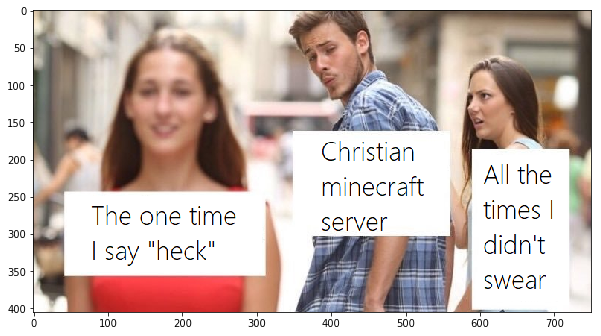

In [35]:
img = cv2.imread('distracted_boyfriend_example.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(rgb)
img.shape

In [22]:
DEFAULT_SHAPE = img.shape[:-1][::-1]
AREA = 10000

-------------------------------------------------------------------------
region: 3 text loc: (562, 153)
aspect ratio: 0.82
Freedomofspeech


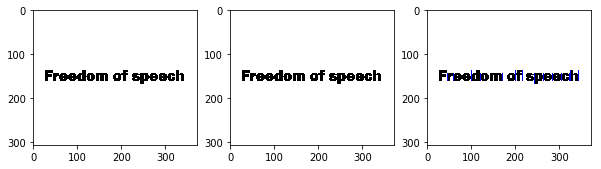

-------------------------------------------------------------------------
region: 3 text loc: (564, 154)
aspect ratio: 0.83
Self
harm


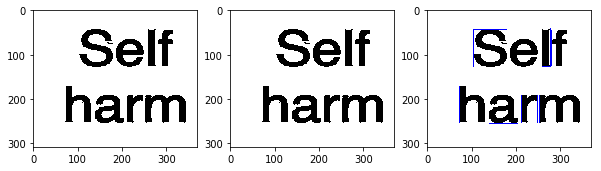

-------------------------------------------------------------------------
region: 3 text loc: (563, 154)
aspect ratio: 0.83
CompromlslngWith
theDemocrats


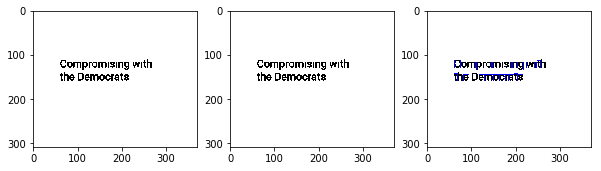

-------------------------------------------------------------------------
-------------------------------------------------------------------------
-------------------------------------------------------------------------
-------------------------------------------------------------------------
region: 2 text loc: (569, 256)
aspect ratio: 1.43



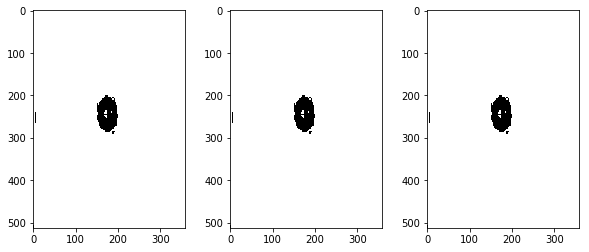

-------------------------------------------------------------------------
-------------------------------------------------------------------------
region: 3 text loc: (563, 155)
aspect ratio: 0.83
InylnaéwkrajuInalydn
rolnilurwIllﬁlzyIIIrobin
Ednaszlmdya1th
momzvsltiIlwmi
Iniméglinniu


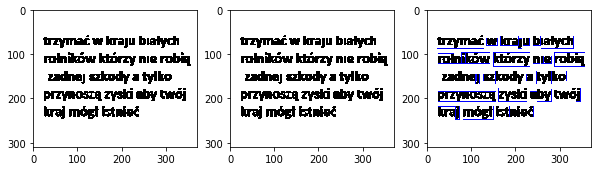

-------------------------------------------------------------------------
region: 3 text loc: (561, 154)
aspect ratio: 0.81



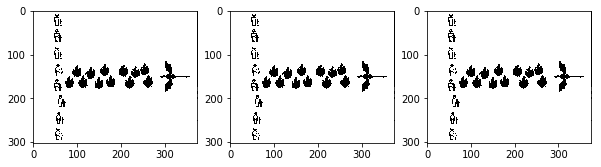

-------------------------------------------------------------------------
-------------------------------------------------------------------------
region: 3 text loc: (570, 151)
aspect ratio: 0.17



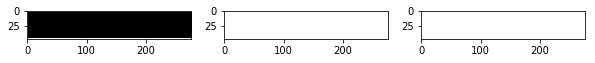

region: 3 text loc: (569, 151)
aspect ratio: 0.44



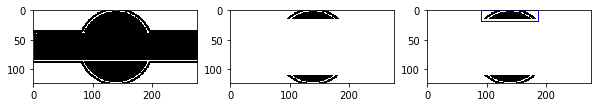

region: 3 text loc: (569, 151)
aspect ratio: 0.46



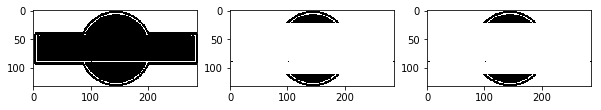

region: 3 text loc: (570, 151)
aspect ratio: 0.60



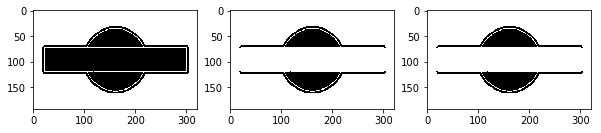

-------------------------------------------------------------------------
-------------------------------------------------------------------------
region: 3 text loc: (565, 152)
aspect ratio: 0.83



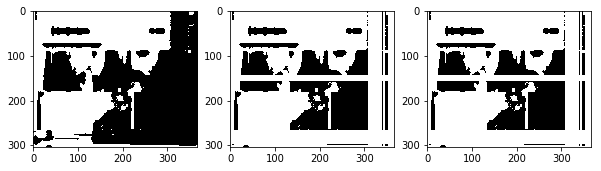

-------------------------------------------------------------------------
region: 3 text loc: (563, 154)
aspect ratio: 0.83



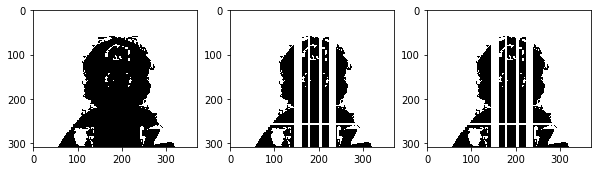

-------------------------------------------------------------------------
-------------------------------------------------------------------------
region: 3 text loc: (534, 209)
aspect ratio: 0.71



KeyboardInterrupt: 

<Figure size 720x288 with 0 Axes>

In [32]:
counter = 0 # indexer for output df
columns=['image', 'region', 'predicted text']
df = pd.DataFrame([])

for im_name in glob('drake/*'):
    img = cv2.imread(im_name)
    if img is None:
        continue
    img = cv2.resize(img, DEFAULT_SHAPE)
    res, mask, rgb = threshold_image(img)
    _, cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    #clean image by filling small holes
    for points in cnts:
        h_min, h_max, w_min, w_max = get_bounds(points, rgb)
        area = (h_max-h_min)*(w_max-w_min)
        if area < 50:
            window = rgb[w_min:w_max, h_min:h_max, :]
            rgb[w_min:w_max, h_min:h_max, :] = np.ones_like(window)*255
            
    # loop over the contours and analyze        
    for points in cnts:
        h_min, h_max, w_min, w_max = get_bounds(points, img)
        area = (h_max-h_min)*(w_max-w_min)
        centroid = int((h_max+h_min)/2), int((w_max+w_min)/2)
        region = determine_region(centroid)
    
        # ensure subimage is large enough, correct aspect ratio, and within predermined location
        if area > AREA and region is not None:
#             and (aspect_ratio(h_min, h_max, w_min, w_max ) > 3.9 or aspect_ratio(h_min, h_max, w_min, w_max ) < 1.9)\
            
            crop_img = rgb[w_min:w_max, h_min:h_max, :]
            crop_img[crop_img > 200] = 255  # threshold
            cleared_black = clear_black_space(crop_img)
            
#             cv2.imwrite('regions/{}-{}.png'.format(i, region), cleared_black)

            blurred = cleared_black.copy()
#                 blurred = crop_and_blur(cleared_black)
            img_w_boxes = draw_char_boxes(blurred)

            text = get_clean_text(crop_img)
            df[counter] = [im_name, region, text]
            
            print('region: {} text loc: {}'.format(region, centroid))
            print('aspect ratio: {0:.2f}'.format(aspect_ratio(h_min, h_max, w_min, w_max)))
            print(text)
                  
            plot(crop_img, cleared_black, img_w_boxes)
            
            counter += 1
    print('-------------------------------------------------------------------------')
df = df.T
df.columns = columns

In [11]:
df.to_csv('distracted_boyfriend.csv')

In [ ]:
plt.scatter([[x[0] for x in centroids]], [x[1] for x in centroids], s=1)
plt.show()
    
p1 = []
for coord in centroids: 
    if coord[1]<360 and coord[1]>265 \
        and coord[0]<320 and coord[0] > 100:
        p1.append(coord)
        
p2 = []
for coord in centroids: 
    if coord[1]<330 and coord[1]>230 \
        and coord[0]<800 and coord[0] > 550:
        p2.append(coord)
        
p3 = []
for coord in centroids: 
    if coord[1]<220 and coord[1]>150 \
        and coord[0]<600 and coord[0] > 370:
        p3.append(coord)
        
plt.scatter([[x[0] for x in p1]], [x[1] for x in p1], s=1)
plt.scatter([[x[0] for x in p2]], [x[1] for x in p2], s=1)
plt.scatter([[x[0] for x in p3]], [x[1] for x in p3], s=1)
plt.show()